<a href="https://colab.research.google.com/github/sathwikaduggineni/Heart_Stroke_Risk_Prediction/blob/main/Heart_Stroke_Risk_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Libraries**

We import these libraries to handle data processing, machine learning, evaluation metrics, visualization, and statistical testing. Using a random seed ensures reproducible results.

In [63]:
# Data handling
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning models
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report, roc_curve, precision_recall_curve

# Handling imbalanced dataset
from imblearn.over_sampling import SMOTE

# Hypothesis testing
from scipy.stats import ttest_rel

# Reproducibility
np.random.seed(42)



**Loading Dataset**

We need to load the data into a DataFrame for exploration and preprocessing. Colab allows uploading files directly.

In [64]:
from google.colab import files
uploaded = files.upload()

# Load the CSV dataset
df = pd.read_csv("stroke_data.csv.csv")
df.head()


Saving stroke_data.csv.csv to stroke_data.csv (10).csv


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


**Exploring the Dataset**

Exploration helps identify missing values, data types, and class imbalance. Visualization shows whether the dataset is balanced or skewed, guiding preprocessing.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


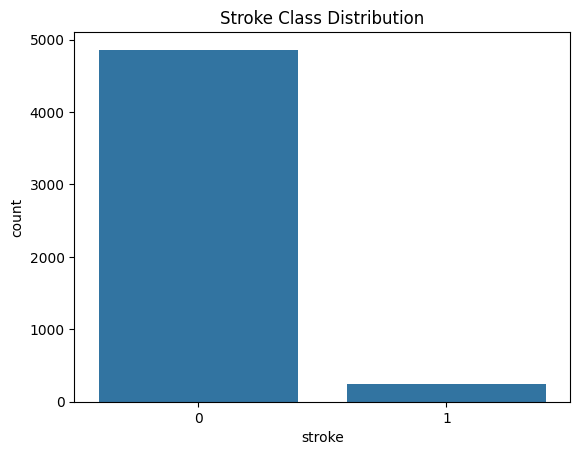

In [65]:
# Check basic information
df.info()

# Count missing values
df.isnull().sum()

# Examine target class distribution
df['stroke'].value_counts()
sns.countplot(x='stroke', data=df)
plt.title("Stroke Class Distribution")
plt.show()


**Data Preprocessing**

In [66]:
# Fill missing BMI values with the median
df['bmi'] = df['bmi'].fillna(df['bmi'].median())

# Fill missing smoking status with mode
df['smoking_status'] = df['smoking_status'].fillna(df['smoking_status'].mode()[0])



**Encode Categorical Features**

Machine learning algorithms require numerical inputs. Label Encoding is used for binary features, and One-Hot Encoding for multi-class features to prevent artificial ordering.

In [67]:
# Label encode binary categorical columns
le = LabelEncoder()
binary_cols = ['gender', 'ever_married', 'Residence_type']
for col in binary_cols:
    df[col] = le.fit_transform(df[col])

# One-hot encode multi-class categorical columns
df = pd.get_dummies(df, columns=['work_type', 'smoking_status'], drop_first=True)


**Seperate Features and Target**

Separating predictors (X) from the target (y) is necessary before training models.

In [68]:
X = df.drop('stroke', axis=1)
y = df['stroke']


**Scale Features**

Scaling numeric features ensures that models like SVM or KNN perform optimally, as they are sensitive to feature magnitude.

In [69]:
scaler = StandardScaler()
X_res_scaled = scaler.fit_transform(X_res)


**Class Imbalance**

In [70]:

smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)


**Splitting Dataset**

Splitting ensures that we can train the model on one set and evaluate on unseen data, preventing overfitting.

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split BEFORE scaling
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Scale only on training data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



**Model Training**

In [72]:
# Import models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Define models with random_state for reproducibility
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced'),
    'Random Forest': RandomForestClassifier(random_state=42, class_weight='balanced'),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'SVM': SVC(probability=True, random_state=42, class_weight='balanced'),
    'KNN': KNeighborsClassifier()
}

# Train all models on training data
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
print("Models trained successfully!")


Training Logistic Regression...
Training Random Forest...
Training Gradient Boosting...
Training SVM...
Training KNN...
Models trained successfully!


**Evaluation Metrics**

These metrics and plots provide a complete understanding of model performance

In [73]:
# Import evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Store metrics for each model
metrics_list = []

for name, model in models.items():
    # Predictions
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:,1] if hasattr(model, "predict_proba") else None

    # Compute metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=0)
    recall = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)
    roc_auc = roc_auc_score(y_test, y_prob) if y_prob is not None else None

    metrics_list.append({
        'Model': name,
        'Accuracy': round(accuracy, 4),
        'Precision': round(precision, 4),
        'Recall': round(recall, 4),
        'F1-score': round(f1, 4),
        'ROC-AUC': round(roc_auc, 4) if roc_auc is not None else None
    })

# Convert to DataFrame for easy viewing
metrics_df = pd.DataFrame(metrics_list)
metrics_df



,Model,Accuracy,Precision,Recall,F1-score,ROC-AUC
0,Logistic Regression,0.7485,0.1394,0.80,0.2374,0.8415
1,Random Forest,0.9511,0.0000,0.00,0.0000,0.7733
2,Gradient Boosting,0.9462,0.1429,0.02,0.0351,0.8257
3,SVM,0.7779,0.1266,0.60,0.2091,0.7824
4,KNN,0.9491,0.2500,0.02,0.0370,0.6423


**Confusion Matrix**

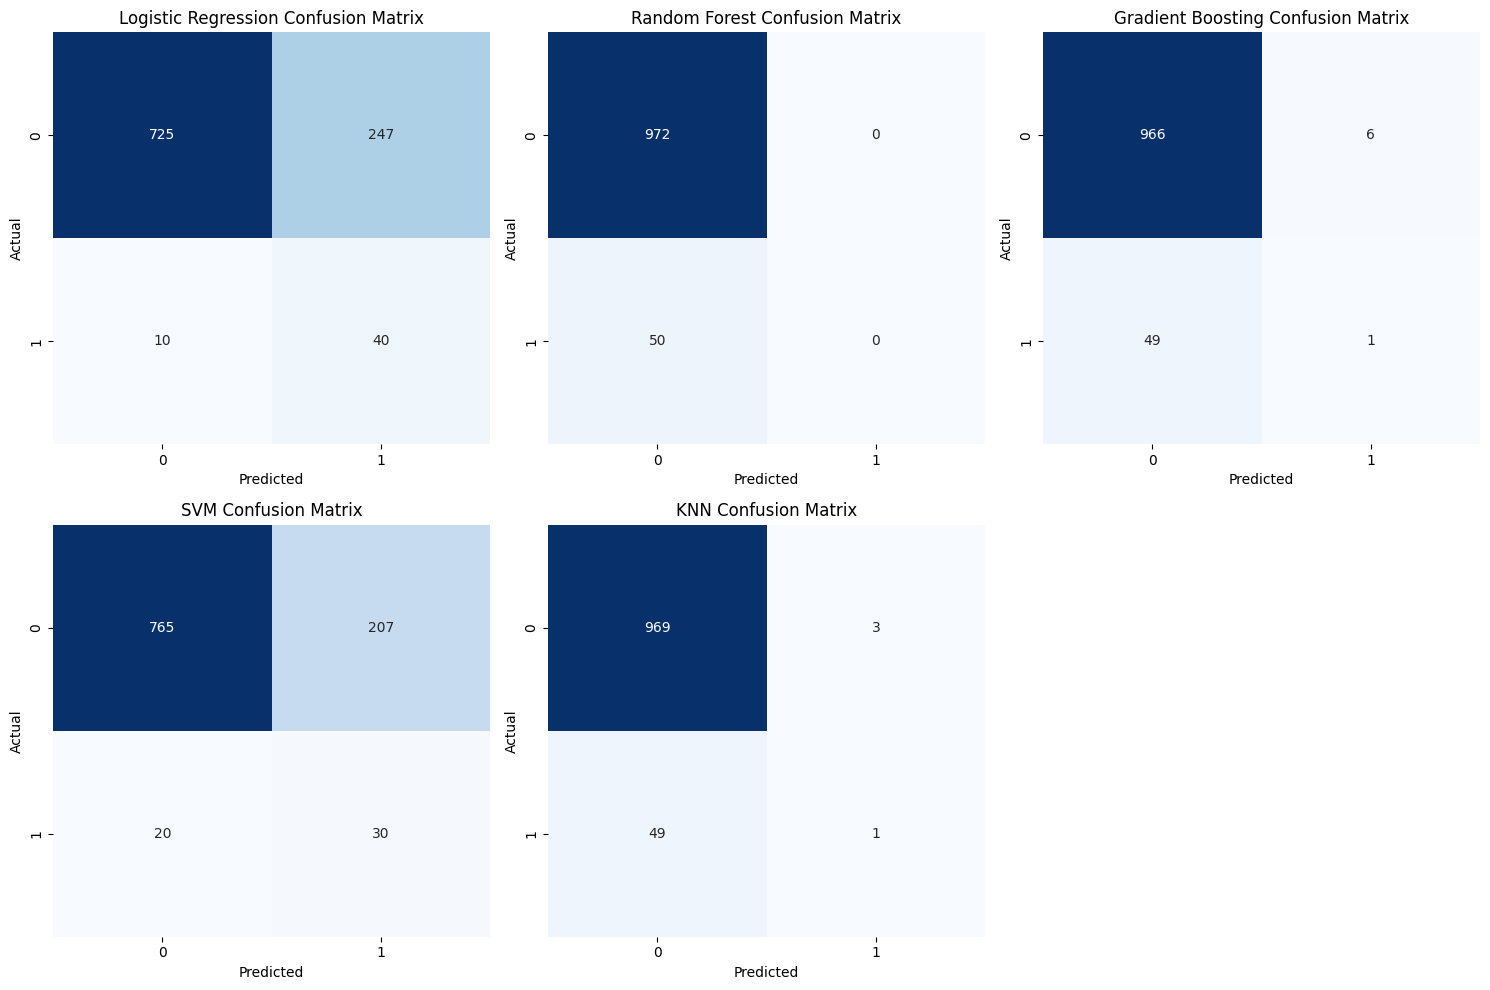

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(15,10))

for i, (name, model) in enumerate(models.items(), 1):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    plt.subplot(2, 3, i)  # Arrange plots in 2 rows, 3 columns
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'{name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

plt.tight_layout()
plt.show()


**Precision Recall & ROC Curves**

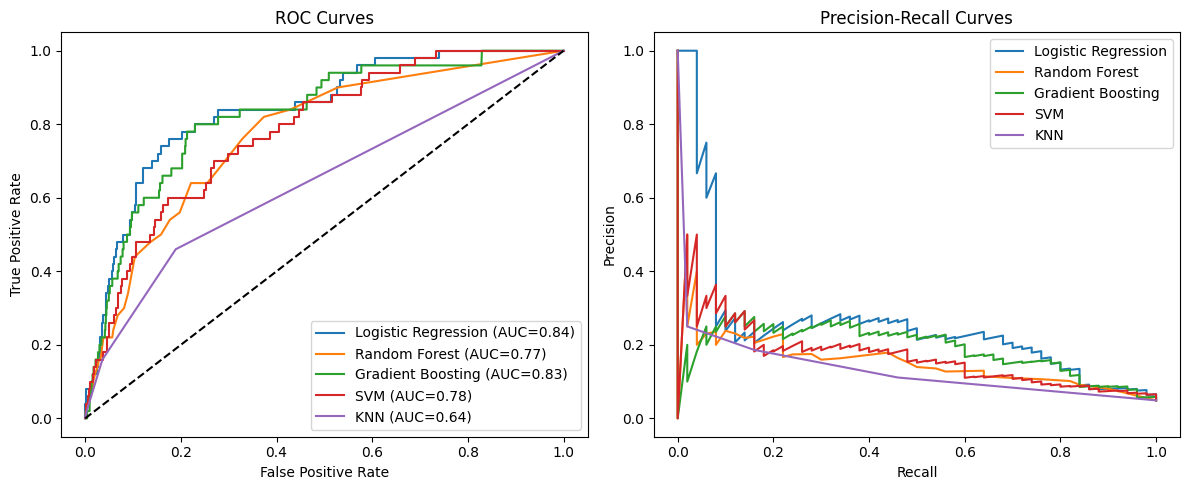

In [75]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve

plt.figure(figsize=(12,5))

# ----------- ROC Curves -----------
plt.subplot(1, 2, 1)
for name, model in models.items():
    if hasattr(model, "predict_proba"):  # Only models with probability outputs
        y_prob = model.predict_proba(X_test)[:,1]
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        auc_score = roc_auc_score(y_test, y_prob)
        plt.plot(fpr, tpr, label=f'{name} (AUC={auc_score:.2f})')

plt.plot([0,1], [0,1], 'k--')  # Diagonal line for random guess
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()

# ---- Precision-Recall Curves ----
plt.subplot(1, 2, 2)
for name, model in models.items():
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)[:,1]
        precision, recall, _ = precision_recall_curve(y_test, y_prob)
        plt.plot(recall, precision, label=name)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves')
plt.legend()
plt.tight_layout()
plt.show()


**Cross Validation & t-test**

Performing 5-Fold Cross Validation...

Logistic Regression: Mean = 0.8738 ± 0.0063
Random Forest: Mean = 0.9524 ± 0.0068
Gradient Boosting: Mean = 0.9109 ± 0.0088
SVM: Mean = 0.9087 ± 0.0065
KNN: Mean = 0.9178 ± 0.0067


/tmp/ipython-input-337364823.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=mean_df, x='Model', y='Mean Accuracy', palette='coolwarm', legend=False, errorbar=None)


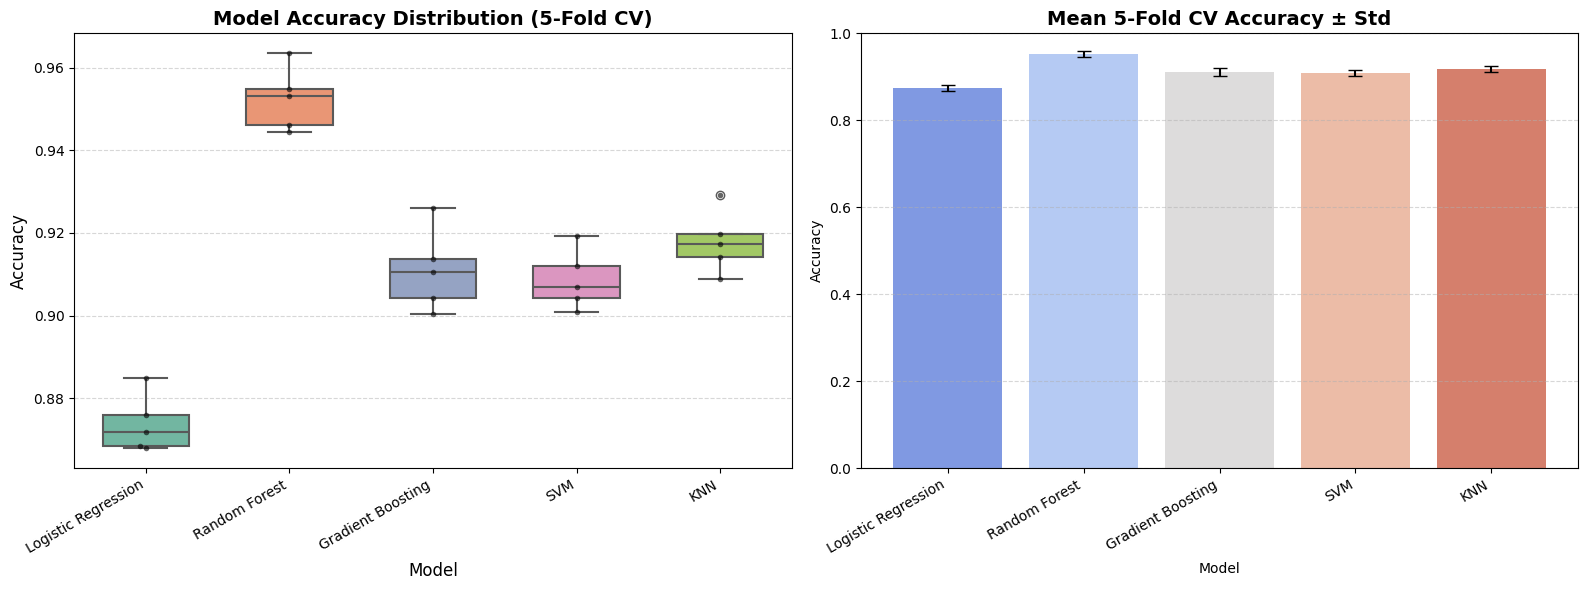


🔍 Paired t-Test vs Baseline: Logistic Regression

               Model  t-statistic       p-value Significant
0      Random Forest  -101.443267  5.662094e-08         Yes
1  Gradient Boosting   -25.621152  1.378348e-05         Yes
2                SVM   -31.085165  6.381873e-06         Yes
3                KNN   -29.873475  7.477749e-06         Yes


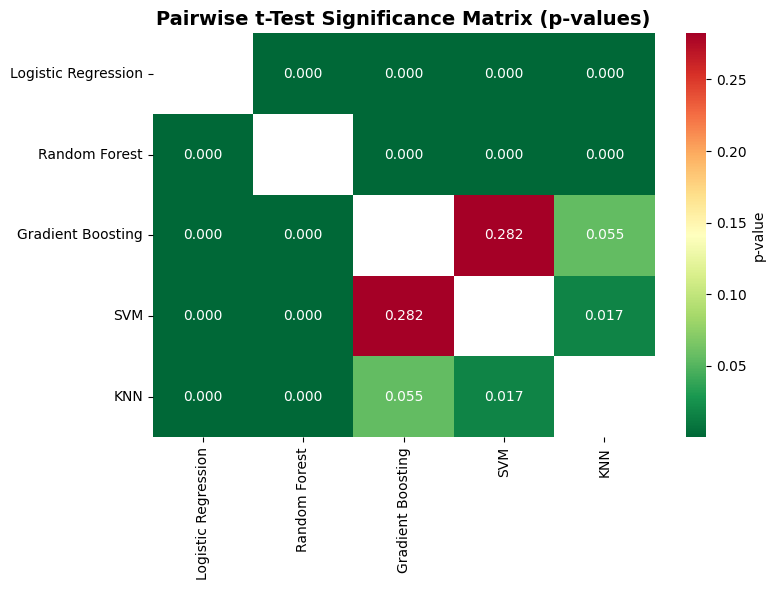

In [76]:
# =============================================
# 📘 Stratified 5-Fold Cross Validation + Paired t-Test + Visualizations (Fixed)
# =============================================

from sklearn.model_selection import cross_val_score, StratifiedKFold
from scipy.stats import ttest_rel
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# -------------------------------------
# 1️⃣  Perform Stratified 5-Fold Cross Validation
# -------------------------------------
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores_dict = {}

print("Performing 5-Fold Cross Validation...\n")
for name, model in models.items():
    scores = cross_val_score(model, X_res_scaled, y_res, cv=cv, scoring='accuracy')
    cv_scores_dict[name] = scores
    print(f"{name}: Mean = {np.mean(scores):.4f} ± {np.std(scores):.4f}")

# Convert to DataFrame for easier visualization
cv_df = pd.DataFrame(cv_scores_dict)

# -------------------------------------
# 2️⃣ Visualization: Cross-Validation Accuracy
# -------------------------------------
plt.figure(figsize=(16,6))

# --- Boxplot + swarmplot (Left) ---
plt.subplot(1,2,1)
sns.boxplot(data=cv_df, palette='Set2', width=0.6, linewidth=1.5)
sns.swarmplot(data=cv_df, color='black', alpha=0.6, size=4)
plt.title('Model Accuracy Distribution (5-Fold CV)', fontsize=14, fontweight='bold')
plt.ylabel('Accuracy', fontsize=12)
plt.xlabel('Model', fontsize=12)
plt.xticks(rotation=30, ha='right')
plt.grid(True, axis='y', linestyle='--', alpha=0.5)

# --- Mean ± Std Bar Chart (Right) ---
plt.subplot(1,2,2)
means = cv_df.mean()
stds = cv_df.std()
mean_df = pd.DataFrame({'Model': means.index, 'Mean Accuracy': means.values, 'Std': stds.values})

sns.barplot(data=mean_df, x='Model', y='Mean Accuracy', palette='coolwarm', legend=False, errorbar=None)
plt.errorbar(x=np.arange(len(mean_df)), y=mean_df['Mean Accuracy'], yerr=mean_df['Std'], fmt='none',
             ecolor='black', elinewidth=1.5, capsize=5)
plt.title('Mean 5-Fold CV Accuracy ± Std', fontsize=14, fontweight='bold')
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.ylim(0, 1)
plt.xticks(rotation=30, ha='right')
plt.grid(True, axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

# -------------------------------------
# 3️⃣  Paired t-Test (vs Baseline)
# -------------------------------------
baseline_name = 'Logistic Regression'
baseline_scores = cv_scores_dict[baseline_name]
alpha = 0.05  # significance level

print(f"\n🔍 Paired t-Test vs Baseline: {baseline_name}\n")

t_test_results = []

for name, scores in cv_scores_dict.items():
    if name == baseline_name:
        continue  # skip baseline
    t_stat, p_val = ttest_rel(baseline_scores, scores)
    t_test_results.append({'Model': name, 't-statistic': t_stat, 'p-value': p_val})

t_test_df = pd.DataFrame(t_test_results)
t_test_df['Significant'] = t_test_df['p-value'].apply(lambda p: 'Yes' if p < alpha else 'No')
print(t_test_df)

# -------------------------------------
# 4️⃣  Visualization: t-Test p-Value Heatmap (All Models)
# -------------------------------------
model_names = list(cv_df.columns)
p_matrix = np.zeros((len(model_names), len(model_names)))

for i, m1 in enumerate(model_names):
    for j, m2 in enumerate(model_names):
        _, p_val = ttest_rel(cv_df[m1], cv_df[m2])
        p_matrix[i, j] = p_val

p_df = pd.DataFrame(p_matrix, index=model_names, columns=model_names)

plt.figure(figsize=(8,6))
sns.heatmap(p_df, annot=True, cmap='RdYlGn_r', fmt='.3f', cbar_kws={'label': 'p-value'})
plt.title('Pairwise t-Test Significance Matrix (p-values)', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


**Results**

In [77]:
# -------------------------------
# 1️⃣ Identify Best Model based on ROC-AUC
# -------------------------------
best_model_name = metrics_df.loc[metrics_df['ROC-AUC'].idxmax(), 'Model']
best_model = models[best_model_name]
print(f"Best model selected based on ROC-AUC: {best_model_name}")

# -------------------------------
# 2️⃣ Predict on Test Set
# -------------------------------
y_pred_best = best_model.predict(X_test)
y_prob_best = best_model.predict_proba(X_test)[:, 1] if hasattr(best_model, "predict_proba") else None

# Combine predictions in DataFrame
results_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred_best
})

if y_prob_best is not None:
    results_df['Probability'] = y_prob_best

# -------------------------------
# 3️⃣ Export Results to CSV
# -------------------------------
results_csv = 'stroke_prediction_results.csv'
metrics_csv = 'model_metrics_summary.csv'

results_df.to_csv(results_csv, index=False)
metrics_df.to_csv(metrics_csv, index=False)

print(f"Predictions exported to {results_csv}")
print(f"Metrics summary exported to {metrics_csv}")



Best model selected based on ROC-AUC: Logistic Regression
Predictions exported to stroke_prediction_results.csv
Metrics summary exported to model_metrics_summary.csv
